# P1: Solve the OpenAI Gym [Taxi V3](https://gym.openai.com/envs/Taxi-v3/) Environment
---

## Introduction
[OpenAI Gym](https://gym.openai.com/docs/) is a framework that provides RL environments of varying complexity with the same standard API making it easy to develop and benchmark RL algorithms. The [Taxi-V3](https://gym.openai.com/envs/Taxi-v3/) environmnet present a simple, text environment where actions and state (observations) are both discrete. 

In [2]:
import gym

The `gym.make()` API can be used to spawn any of the available environments by passing its full name.

In [3]:
taxi = gym.make('Taxi-v3')

The Taxi environment has 500 states and 6 possible actions.

In [4]:
taxi.action_space

Discrete(6)

In [5]:
taxi.observation_space

Discrete(500)

The task and reward structure are described in the [documentation](https://github.com/openai/gym/blob/a5a6ae6bc0a5cfc0ff1ce9be723d59593c165022/gym/envs/toy_text/taxi.py#L25)

In [6]:
taxi.reset()
taxi.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [8]:
def epsilon_greedy_action_from_Q(Q, state, epsilon):
    actions = Q.columns
    action_probs = np.asarray([epsilon/len(actions)]*len(actions),dtype=np.float)
    
    greedy_action_index = np.argmax(Q.loc[state].values)
    action_probs[greedy_action_index] += 1-epsilon

    epsilon_greedy_action = np.random.choice(Q.columns,p=action_probs)
    
    return epsilon_greedy_action

In [9]:
def greedy_policy_from_returns_tbl(table):
    policy = {s:None for s in table.index }
    for state in table.index:        
       greedy_action = table.loc[state].idxmax()
       policy[state] = greedy_action
            
    return policy

In [28]:
#from tqdm import tqdm 
import numpy as np
import pandas as pd
Q = pd.DataFrame.from_dict({s:{a:0 for a in range(taxi.nA)} for s in range(taxi.nS)}, orient='index')

HYPER_PARAMS = {'gamma':0.9}

n_episodes = 10000
max_episode_len = 100
epsilon = 1
min_epsilon = 0.01
epsilon_decay = 0.99

alpha = 0.1

rewards = np.zeros(n_episodes)


#for i in tqdm(range(n_episodes)):
for i in range(n_episodes):
    taxi.reset()
    s0 = taxi.s
    done = False
    
    episode_reward = 0

    for step in range(max_episode_len):
        a0 = epsilon_greedy_action_from_Q(Q,s0,epsilon)
        out  = taxi.step(a0)
        s1 = out[0]
        reward = out[1]
        done = out[2]
        
        Q.loc[s0,a0] += alpha*(reward + HYPER_PARAMS['gamma']*Q.loc[s1].max() - Q.loc[s0,a0])
        episode_reward += reward
        s0 = s1

        assert (reward!=-10) or (i<n_episodes-1000)

        if done:
          print ("reward for episode {}: {}".format(i, episode_reward))
          break
  
    epsilon *= epsilon_decay
    epsilon = max(epsilon,min_epsilon) if i<n_episodes-1000 else 0  

    rewards[i] = episode_reward
        

Streaming output truncated to the last 5000 lines.
reward for episode 5000: 8
reward for episode 5001: 5
reward for episode 5002: 10
reward for episode 5003: 6
reward for episode 5004: 7
reward for episode 5005: 9
reward for episode 5006: 8
reward for episode 5007: 7
reward for episode 5008: 9
reward for episode 5009: 12
reward for episode 5010: 10
reward for episode 5011: 8
reward for episode 5012: 7
reward for episode 5013: 6
reward for episode 5014: 10
reward for episode 5015: 11
reward for episode 5016: 5
reward for episode 5017: 11
reward for episode 5018: 7
reward for episode 5019: 9
reward for episode 5020: -4
reward for episode 5021: 10
reward for episode 5022: 10
reward for episode 5023: 10
reward for episode 5024: 3
reward for episode 5025: 3
reward for episode 5026: 4
reward for episode 5027: 7
reward for episode 5028: 9
reward for episode 5029: 9
reward for episode 5030: 10
reward for episode 5031: 6
reward for episode 5032: 9
reward for episode 5033: 5
reward for episode 5

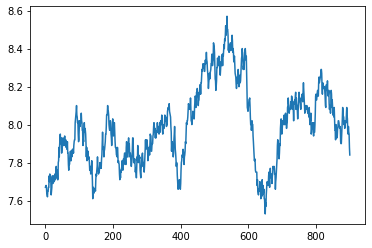

In [29]:
import matplotlib.pyplot as plt
windowed_rewards = np.convolve(rewards[-1000:], np.ones(100), 'valid')
plt.plot(windowed_rewards/100)
plt.show()

In [23]:
np.quantile(windowed_rewards/100,[0.05, 0.95])

array([7.55, 8.28])

## Submission
- Submit your solution as a Jupyter notebook. 
- Ensure that all cells in the notebook have been executed and the output is showing
- Ensure that your solution consistently reaches the average cumulative reward defined in the rubric (link below)
- Post your solution on Github and share the link to your commit as a direct message in Slack

## Evaluation
The goal of the project is to get a certain average (cumulative) reward over 100 episodes. To pass the project, you must meet all the requirments in the project [rubric](https://github.com/KnowchowHQ/rl-in-action/blob/master/C1-RL-Intro/W3OH/P1-rubric.md)